In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

In [2]:
df = pd.read_csv('ucb_stanford_2014.csv', parse_dates=True, index_col='Award Date')

In [3]:
df = df.sort_values(by="Award Date")

In [4]:
df.head()

,Transaction,Award ID,Order Number,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,...,Award Amount,Award Type,Awarding Agency,Awarding Bureau,Funding Agency,Funding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,,,
2013-10-01,207FB5C6-51D6-4374-A1A7-F73B1E0470BE,S1593A-A,NaN,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,...,"$188,950.00",Others,National Science Foundation,National Science Foundation,NaN,NaN,NaN,NaN,2014,Sub
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,NaN,9214214,Interuniveristy Center for Japanese Language,Stanford,CA,14,USA,CA,...,"$125,000.00",Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,NaN,NaN,90.3,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-01,CA66FA55-8C7E-4078-AD21-628E09ECE282,33016218110,NaN,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,...,"$61,400.00",Others,National Science Foundation,National Science Foundation,NaN,NaN,NaN,NaN,2014,Sub
2013-10-02,2A33C28B-B9F4-4D99-9E99-B359216D3F44,47680,NaN,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,...,"$111,860.00",Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,NaN,NaN,2014,Sub
2013-10-03,22E1C82B-D048-4069-AB17-B56F2D246344,1000257830,NaN,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,...,"$229,906.00",Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,NaN,NaN,2014,Sub


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3413 entries, 2013-10-01 to 2014-10-23
Data columns (total 22 columns):
Transaction          3413 non-null object
Award ID             3413 non-null object
Order Number         0 non-null float64
DUNS                 3413 non-null int64
Recipient            3413 non-null object
Recipient City       3413 non-null object
Recipient State      3413 non-null object
Recipient CD         3413 non-null int64
Recipient Country    3413 non-null object
Pop State            3397 non-null object
Pop CD               3296 non-null object
Pop Country          3407 non-null object
Award Amount         3413 non-null object
Award Type           3413 non-null object
Awarding Agency      3413 non-null object
Awarding Bureau      3413 non-null object
Funding Agency       0 non-null float64
Funding Bureau       0 non-null float64
CFDA Code            3096 non-null float64
CFDA Title           3096 non-null object
Fiscal Year          3413 non-null int64
R

I see that there are three columns that have only missing values. They are "Order Number", "Funding Agency" and "Funding Bureau". These are therefore useless and needs to be dropped.

In [7]:
df = df.drop(['Order Number', 'Funding Agency', 'Funding Bureau'], axis = 1) 

In [8]:
df.describe()

,DUNS,Recipient CD,CFDA Code,Fiscal Year
count,3.413000e+03,3413.000000,3096.000000,3413.0
mean,5.615704e+07,15.341928,69.344670,2014.0
std,5.674326e+07,3.327475,29.343665,0.0
min,9.214214e+06,2.000000,10.001000,2014.0
25%,9.214214e+06,13.000000,47.049000,2014.0
50%,9.214214e+06,18.000000,93.113000,2014.0
75%,1.247267e+08,18.000000,93.847000,2014.0
max,1.247267e+08,18.000000,98.001000,2014.0


In [9]:
df.columns

Index(['Transaction', 'Award ID', 'DUNS', 'Recipient', 'Recipient City',
       'Recipient State', 'Recipient CD', 'Recipient Country', 'Pop State',
       'Pop CD', 'Pop Country', 'Award Amount', 'Award Type',
       'Awarding Agency', 'Awarding Bureau', 'CFDA Code', 'CFDA Title',
       'Fiscal Year', 'Role'],
      dtype='object')

In [10]:
df.head()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount,Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-01,207FB5C6-51D6-4374-A1A7-F73B1E0470BE,S1593A-A,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,"$188,950.00",Others,National Science Foundation,National Science Foundation,NaN,NaN,2014,Sub
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,9214214,Interuniveristy Center for Japanese Language,Stanford,CA,14,USA,CA,14,USA,"$125,000.00",Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,90.3,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-01,CA66FA55-8C7E-4078-AD21-628E09ECE282,33016218110,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,13,USA,"$61,400.00",Others,National Science Foundation,National Science Foundation,NaN,NaN,2014,Sub
2013-10-02,2A33C28B-B9F4-4D99-9E99-B359216D3F44,47680,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,"$111,860.00",Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,2014,Sub
2013-10-03,22E1C82B-D048-4069-AB17-B56F2D246344,1000257830,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,"$229,906.00",Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,2014,Sub


Another observation is that the Award Amount column contains "," and "$" which make it and object type instead of a numeric type. This will not allow us to apply mathematical and statistical functions to the column. We will fix this by getinng rid of these characters and converting the type to float.

In [11]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace('(', '').replace(')', ''))
    return(x)

In [12]:
df['Award Amount'] = df['Award Amount'].apply(clean_currency).astype('float')

We will now rename the "Award Amount" column to "Award Amount ($)"

In [13]:
df.rename(columns={'Award Amount':'Award Amount ($)'}, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3413 entries, 2013-10-01 to 2014-10-23
Data columns (total 19 columns):
Transaction          3413 non-null object
Award ID             3413 non-null object
DUNS                 3413 non-null int64
Recipient            3413 non-null object
Recipient City       3413 non-null object
Recipient State      3413 non-null object
Recipient CD         3413 non-null int64
Recipient Country    3413 non-null object
Pop State            3397 non-null object
Pop CD               3296 non-null object
Pop Country          3407 non-null object
Award Amount ($)     3413 non-null float64
Award Type           3413 non-null object
Awarding Agency      3413 non-null object
Awarding Bureau      3413 non-null object
CFDA Code            3096 non-null float64
CFDA Title           3096 non-null object
Fiscal Year          3413 non-null int64
Role                 3413 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 533.3+ KB


In [15]:
df.describe()

,DUNS,Recipient CD,Award Amount ($),CFDA Code,Fiscal Year
count,3.413000e+03,3413.000000,3.413000e+03,3096.000000,3413.0
mean,5.615704e+07,15.341928,1.177073e+06,69.344670,2014.0
std,5.674326e+07,3.327475,5.140284e+07,29.343665,0.0
min,9.214214e+06,2.000000,0.000000e+00,10.001000,2014.0
25%,9.214214e+06,13.000000,5.000000e+04,47.049000,2014.0
50%,9.214214e+06,18.000000,1.500010e+05,93.113000,2014.0
75%,1.247267e+08,18.000000,3.441740e+05,93.847000,2014.0
max,1.247267e+08,18.000000,3.003047e+09,98.001000,2014.0


In [16]:
df.head()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-01,207FB5C6-51D6-4374-A1A7-F73B1E0470BE,S1593A-A,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,188950.0,Others,National Science Foundation,National Science Foundation,NaN,NaN,2014,Sub
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,9214214,Interuniveristy Center for Japanese Language,Stanford,CA,14,USA,CA,14,USA,125000.0,Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,90.3,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-01,CA66FA55-8C7E-4078-AD21-628E09ECE282,33016218110,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,13,USA,61400.0,Others,National Science Foundation,National Science Foundation,NaN,NaN,2014,Sub
2013-10-02,2A33C28B-B9F4-4D99-9E99-B359216D3F44,47680,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,111860.0,Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,2014,Sub
2013-10-03,22E1C82B-D048-4069-AB17-B56F2D246344,1000257830,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,229906.0,Others,Department of Health and Human Services,Department of Health and Human Services,NaN,NaN,2014,Sub


In [17]:
df.tail()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2014-09-30,43D08C39-38ED-51D5-924D-F703C73C7660,P015B140015,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,13,USA,253500.0,Grants,Department of Education,Department of Education,84.015,National Resource Centers Program for Foreign ...,2014,Prime
2014-10-16,76A4A4C1-CCD5-E576-6B17-09B65807C386,F31NS078814,9214214,STANFORD UNIVERSITY,Stanford,CA,18,USA,CA,18,USA,23055.0,Grants,Department of Health and Human Services,National Institutes of Health,93.853,Extramural Research Programs in the Neuroscien...,2014,Prime
2014-10-20,A05176B0-8813-B5F1-1D34-32364E716034,F32AI112205,124726725,"UNIVERSITY OF CALIFORNIA, REGENTS",Berkeley,CA,9,USA,CA,13,USA,51530.0,Grants,Department of Health and Human Services,National Institutes of Health,93.855,"Allergy, Immunology and Transplantation Research",2014,Prime
2014-10-22,5D41987B-B102-EC66-BCC3-285A21DAC3FD,R00CA166186,9214214,STANFORD UNIVERSITY,Stanford,CA,18,USA,CA,18,USA,241530.0,Grants,Department of Health and Human Services,National Institutes of Health,93.395,Cancer Treatment Research,2014,Prime
2014-10-23,645B5284-377C-3EB4-846D-E5ACD08D594A,R00CA166186,9214214,STANFORD UNIVERSITY,Stanford,CA,18,USA,CA,18,USA,241530.0,Grants,Department of Health and Human Services,National Institutes of Health,93.395,Cancer Treatment Research,2014,Prime


In [18]:
df['Award Type'].unique()

array(['Others', 'Grants', 'Sub-Grant'], dtype=object)

There are only three types of grants.

In [19]:
df['Award Amount ($)'].unique()

array([188950., 125000.,  61400., ...,  21041., 253500.,  23055.])

In [20]:
df[df['Award Amount ($)'] < 1]

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-03,202439D4-2CB0-1CD2-1A6C-8FBF83A4D9F9,N660010912024,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,0.0,Grants,Department of Defense,Department of Defense,12.910,Research and Technology Development,2014,Prime
2013-10-10,459A8C12-17F2-6FF5-61E7-E1A1CBD4D1CA,W81XWH1210575,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,0.0,Grants,Department of Defense,Department of Defense,12.420,Military Medical Research and Development,2014,Prime
2013-10-15,D8247079-4BEE-C465-8194-9E4DA00C41CC,DESC0005290,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Menlo Park,CA,14,USA,CA,14,USA,0.0,Grants,Department of Energy,Department of Energy,81.049,Office of Science Financial Assistance Program,2014,Prime
2013-10-18,69A91B0A-F2A3-36EF-6379-411D80D39739,NNX13AO36G,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,13,USA,0.0,Grants,National Aeronautics and Space Administration,National Aeronautics and Space Administration,43.001,Science,2014,Prime
2013-10-25,32358799-7CAF-ECD8-FE6B-EBFAFD1B2F6C,DEOE0000120,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,09,USA,0.0,Grants,Department of Energy,Department of Energy,81.122,"Electricity Delivery and Energy Reliability, R...",2014,Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-22,C358C972-752A-A39D-025B-94E93C8FAE82,DEEE0006343,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Palo Alto,CA,18,USA,CA,18,USA,0.0,Grants,Department of Energy,Department of Energy,81.087,Renewable Energy Research and Development,2014,Prime
2014-09-23,121B86F6-F09B-2722-A55D-341BB8E88A7C,L14AC00159,124726725,"REGENTS OF THE UNIVERSITY OF CALIFO RNIA, THE",Berkeley,CA,13,USA,CA,13,USA,0.0,Grants,Department of the Interior,Bureau of Land Management,15.232,Wildland Fire Research and Studies Program,2014,Prime
2014-09-24,8865593F-7558-D9C0-91F9-29C0E279482F,NNX12AD48G,124726725,"REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE",Berkeley,CA,13,USA,CA,13,USA,0.0,Grants,National Aeronautics and Space Administration,National Aeronautics and Space Administration,43.001,Science,2014,Prime


In [21]:
df = df.dropna(axis=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2968 entries, 2013-10-01 to 2014-10-23
Data columns (total 19 columns):
Transaction          2968 non-null object
Award ID             2968 non-null object
DUNS                 2968 non-null int64
Recipient            2968 non-null object
Recipient City       2968 non-null object
Recipient State      2968 non-null object
Recipient CD         2968 non-null int64
Recipient Country    2968 non-null object
Pop State            2968 non-null object
Pop CD               2968 non-null object
Pop Country          2968 non-null object
Award Amount ($)     2968 non-null float64
Award Type           2968 non-null object
Awarding Agency      2968 non-null object
Awarding Bureau      2968 non-null object
CFDA Code            2968 non-null float64
CFDA Title           2968 non-null object
Fiscal Year          2968 non-null int64
Role                 2968 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 463.8+ KB


In [23]:
df.head()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,9214214,Interuniveristy Center for Japanese Language,Stanford,CA,14,USA,CA,14,USA,125000.0,Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,90.300,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-03,202439D4-2CB0-1CD2-1A6C-8FBF83A4D9F9,N660010912024,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,0.0,Grants,Department of Defense,Department of Defense,12.910,Research and Technology Development,2014,Prime
2013-10-09,D023EE33-4313-AA17-F4A2-82C85A183BB0,W911NF1410001,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,150000.0,Grants,Department of Defense,Department of Defense,12.431,Basic Scientific Research,2014,Prime
2013-10-10,459A8C12-17F2-6FF5-61E7-E1A1CBD4D1CA,W81XWH1210575,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,0.0,Grants,Department of Defense,Department of Defense,12.420,Military Medical Research and Development,2014,Prime
2013-10-15,D8247079-4BEE-C465-8194-9E4DA00C41CC,DESC0005290,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Menlo Park,CA,14,USA,CA,14,USA,0.0,Grants,Department of Energy,Department of Energy,81.049,Office of Science Financial Assistance Program,2014,Prime


We are still seeing that there are records in which the Award Amount is $0.0. This can be looked at as missing data for the awarded amount as it doesn't make sense to award 0 dollars as grants. We will get rid of all the rows that have Award Amount equal to 0.

In [24]:
df = df[df['Award Amount ($)'] != 0]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2790 entries, 2013-10-01 to 2014-10-23
Data columns (total 19 columns):
Transaction          2790 non-null object
Award ID             2790 non-null object
DUNS                 2790 non-null int64
Recipient            2790 non-null object
Recipient City       2790 non-null object
Recipient State      2790 non-null object
Recipient CD         2790 non-null int64
Recipient Country    2790 non-null object
Pop State            2790 non-null object
Pop CD               2790 non-null object
Pop Country          2790 non-null object
Award Amount ($)     2790 non-null float64
Award Type           2790 non-null object
Awarding Agency      2790 non-null object
Awarding Bureau      2790 non-null object
CFDA Code            2790 non-null float64
CFDA Title           2790 non-null object
Fiscal Year          2790 non-null int64
Role                 2790 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 435.9+ KB


In [26]:
df.describe()

,DUNS,Recipient CD,Award Amount ($),CFDA Code,Fiscal Year
count,2.790000e+03,2790.000000,2.790000e+03,2790.000000,2790.0
mean,5.806897e+07,15.182796,3.266995e+05,70.660304,2014.0
std,5.707640e+07,3.417353,7.129614e+05,28.551411,0.0
min,9.214214e+06,9.000000,1.000000e+00,10.001000,2014.0
25%,9.214214e+06,13.000000,5.773400e+04,47.050000,2014.0
50%,9.214214e+06,18.000000,1.806060e+05,93.172000,2014.0
75%,1.247267e+08,18.000000,3.622285e+05,93.853000,2014.0
max,1.247267e+08,18.000000,1.458366e+07,98.001000,2014.0


In [27]:
df.head()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,9214214,Interuniveristy Center for Japanese Language,Stanford,CA,14,USA,CA,14,USA,125000.0,Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,90.300,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-09,D023EE33-4313-AA17-F4A2-82C85A183BB0,W911NF1410001,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,150000.0,Grants,Department of Defense,Department of Defense,12.431,Basic Scientific Research,2014,Prime
2013-10-22,95A7A952-747B-A4BC-ADFF-A86AF466F4D3,FA87501420006,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,201512.0,Grants,Department of Defense,Department of Defense,12.300,Basic and Applied Scientific Research,2014,Prime
2013-10-22,7C4AF456-0F54-0C1C-416E-A169E5D9A372,N000141010291,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,209066.0,Grants,Department of Defense,Department of Defense,12.300,Basic and Applied Scientific Research,2014,Prime
2013-10-30,6ED065F0-3B47-49F7-A3B0-F7D48D4F770D,M177250,9214214,"LELAND STANFORD JUNIOR UNIVERSITY, THE",Stanford,CA,18,USA,CA,18,USA,22429.0,Others,Department of Health and Human Services,Centers for Medicare & Medicaid Services,93.610,Health Care Innovation Awards (HCIA),2014,Sub


In [28]:
df.Recipient.unique()

array(['Interuniveristy Center for Japanese Language',
       'LELAND STANFORD JUNIOR UNIVERSITY, THE',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE',
       'STANFORD UNIVERSITY',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA THE (',
       'Board of Trustees of', 'University of California, Berkeley',
       'UNIVERSITY OF CALIFORNIA, REGENTS',
       'The Regents of the University of CA - Berkele',
       'REGENTS OF THE UNIVERSITY OF CALIFO RNIA, THE',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA,',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'Regents of the University of California at Be',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'LELAND STANFORD JUNIOR UNIVERSITY, BOARD OF T',
       'REGENTS OF THE UNIVERSITY OF CALIFO NIA, THE',
       'The Regents of University of California',
       'Board of Trustees of the Leland Stanford Juni',
       'LELAND STANFORD JUNIOR UNIVERSITY THE',
       'THE BOARD OF TRUSTEES OF THE LELAND STANFO

From above, we see that most receipients are uppercase but some are not. We also see that the reciepients column should be categorical but we see that there are inconsistenciences in naming. We will first convert all the values to uppercase and also rename the universities based on unique criteria.


In [29]:
df['Recipient'] = df['Recipient'].str.upper()

We will now check if the changes have taken effect.

In [30]:
df.Recipient.unique()

array(['INTERUNIVERISTY CENTER FOR JAPANESE LANGUAGE',
       'LELAND STANFORD JUNIOR UNIVERSITY, THE',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE',
       'STANFORD UNIVERSITY',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA THE (',
       'BOARD OF TRUSTEES OF', 'UNIVERSITY OF CALIFORNIA, BERKELEY',
       'UNIVERSITY OF CALIFORNIA, REGENTS',
       'THE REGENTS OF THE UNIVERSITY OF CA - BERKELE',
       'REGENTS OF THE UNIVERSITY OF CALIFO RNIA, THE',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA,',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA AT BE',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'LELAND STANFORD JUNIOR UNIVERSITY, BOARD OF T',
       'REGENTS OF THE UNIVERSITY OF CALIFO NIA, THE',
       'THE REGENTS OF UNIVERSITY OF CALIFORNIA',
       'BOARD OF TRUSTEES OF THE LELAND STANFORD JUNI',
       'LELAND STANFORD JUNIOR UNIVERSITY THE',
       'THE BOARD OF TRUSTEES OF THE LELAND STANFO

It has!

In [31]:
df.Recipient.unique()

array(['INTERUNIVERISTY CENTER FOR JAPANESE LANGUAGE',
       'LELAND STANFORD JUNIOR UNIVERSITY, THE',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE',
       'STANFORD UNIVERSITY',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA THE (',
       'BOARD OF TRUSTEES OF', 'UNIVERSITY OF CALIFORNIA, BERKELEY',
       'UNIVERSITY OF CALIFORNIA, REGENTS',
       'THE REGENTS OF THE UNIVERSITY OF CA - BERKELE',
       'REGENTS OF THE UNIVERSITY OF CALIFO RNIA, THE',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA,',
       'THE REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA AT BE',
       'REGENTS OF THE UNIVERSITY OF CALIFORNIA',
       'LELAND STANFORD JUNIOR UNIVERSITY, BOARD OF T',
       'REGENTS OF THE UNIVERSITY OF CALIFO NIA, THE',
       'THE REGENTS OF UNIVERSITY OF CALIFORNIA',
       'BOARD OF TRUSTEES OF THE LELAND STANFORD JUNI',
       'LELAND STANFORD JUNIOR UNIVERSITY THE',
       'THE BOARD OF TRUSTEES OF THE LELAND STANFO

In [32]:
df.loc[df['Recipient'].str.contains('STANFORD'), 'Recipient'] = 'Stanford University'
df.loc[df['Recipient'].str.contains('REGENTS'), 'Recipient'] = 'UC Berkeley'
df.loc[df['Recipient'].str.contains('CALIFORNIA'), 'Recipient'] = 'UC Berkeley'
df.loc[df['Recipient'].str.contains('CENTER FOR JAPANESE LANGUAGE'), 'Recipient'] = 'Stanford University'
df.loc[df['Recipient'].str.contains('BOARD OF TRUSTEES'), 'Recipient'] = 'Stanford University'

In [33]:
df.Recipient.unique()

array(['Stanford University', 'UC Berkeley'], dtype=object)

In [34]:
df.Recipient.describe()

count                    2790
unique                      2
top       Stanford University
freq                     1610
Name: Recipient, dtype: object

This shows that Stanford University has the higehest number of awards.

In [35]:
df['Recipient City'].unique()

array(['Stanford                    ', 'BERKELEY',
       'Berkeley                    ', 'Palo Alto                   ',
       'Berkeley', 'SANTA CLARA', 'Stanford',
       'Pasadena                    ', 'STANFORD',
       'Vallejo                     ', 'PALO ALTO', 'Palo Alto',
       'Veterans Bureau Hospi'], dtype=object)

We see from the above that the Recipient Cities are not cleaned. There are trailing whitespaces after city names and they don't have the same case format. This has to be cleaned.

In [36]:
df['Recipient City'] = df['Recipient City'].str.upper()

In [37]:
df.loc[df['Recipient City'].str.contains('STANFORD'), 'Recipient City'] = 'STANFORD'
df.loc[df['Recipient City'].str.contains('BERKELEY'), 'Recipient City'] = 'BERKELEY'
df.loc[df['Recipient City'].str.contains('PALO ALTO'), 'Recipient City'] = 'PALO ALTO'
df.loc[df['Recipient City'].str.contains('VETERANS BUREAU HOSPI'), 'Recipient City'] = 'VETERANS BUREAU'
df.loc[df['Recipient City'].str.contains('VALLEJO'), 'Recipient City'] = 'VALLEJO'
df.loc[df['Recipient City'].str.contains('PASADENA'), 'Recipient City'] = 'PASADENA'

In [38]:
df['Recipient City'].describe()

count         2790
unique           7
top       STANFORD
freq          1350
Name: Recipient City, dtype: object

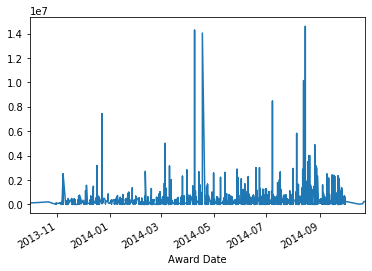

In [39]:
df['Award Amount ($)'].plot()

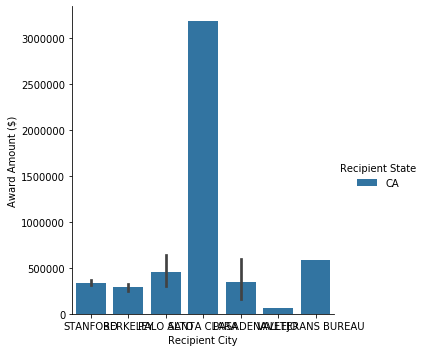

In [40]:
sns.catplot(x="Recipient City", y="Award Amount ($)", hue="Recipient State", kind="bar", data=df);


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

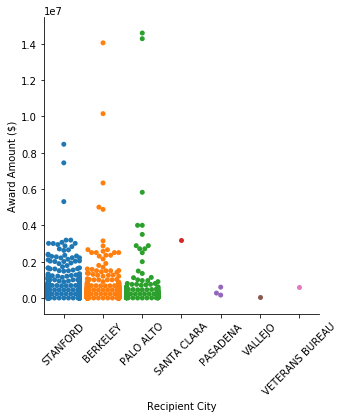

In [41]:
sns.catplot(x="Recipient City", y="Award Amount ($)",
            kind="swarm", data=df)
plt.xticks(rotation=45)

In [42]:
df.head()

,Transaction,Award ID,DUNS,Recipient,Recipient City,Recipient State,Recipient CD,Recipient Country,Pop State,Pop CD,Pop Country,Award Amount ($),Award Type,Awarding Agency,Awarding Bureau,CFDA Code,CFDA Title,Fiscal Year,Role
Award Date,,,,,,,,,,,,,,,,,,,
2013-10-01,885989FF-4A81-52C0-1C60-6E4B21B2B411,JUSFC1412,9214214,Stanford University,STANFORD,CA,14,USA,CA,14,USA,125000.0,Grants,Japan-U.S. Friendship Commission,Japan-U.S. Friendship Commission,90.300,Japan-U.S. Friendship Commission Grants,2014,Prime
2013-10-09,D023EE33-4313-AA17-F4A2-82C85A183BB0,W911NF1410001,9214214,Stanford University,STANFORD,CA,18,USA,CA,18,USA,150000.0,Grants,Department of Defense,Department of Defense,12.431,Basic Scientific Research,2014,Prime
2013-10-22,95A7A952-747B-A4BC-ADFF-A86AF466F4D3,FA87501420006,9214214,Stanford University,STANFORD,CA,18,USA,CA,18,USA,201512.0,Grants,Department of Defense,Department of Defense,12.300,Basic and Applied Scientific Research,2014,Prime
2013-10-22,7C4AF456-0F54-0C1C-416E-A169E5D9A372,N000141010291,9214214,Stanford University,STANFORD,CA,18,USA,CA,18,USA,209066.0,Grants,Department of Defense,Department of Defense,12.300,Basic and Applied Scientific Research,2014,Prime
2013-10-30,6ED065F0-3B47-49F7-A3B0-F7D48D4F770D,M177250,9214214,Stanford University,STANFORD,CA,18,USA,CA,18,USA,22429.0,Others,Department of Health and Human Services,Centers for Medicare & Medicaid Services,93.610,Health Care Innovation Awards (HCIA),2014,Sub


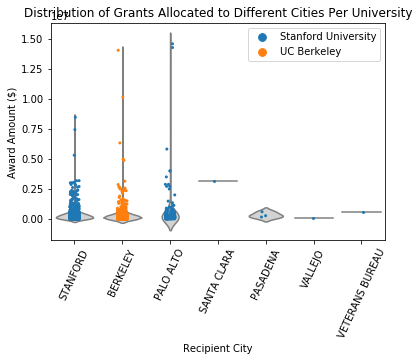

In [43]:
sns.violinplot(x='Recipient City', y='Award Amount ($)', data=df, inner=None, color='lightgray')

sns.stripplot(x='Recipient City', y='Award Amount ($)', data=df, hue='Recipient', jitter=True, size=3)
plt.title('Distribution of Grants Allocated to Different Cities Per University')
plt.ylabel('Award Amount ($)')
plt.xticks(rotation=65)
plt.legend(loc='upper right')
plt.show()
# plt.savefig('G_D_C_U1.png')


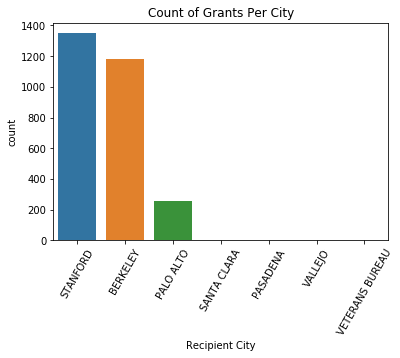

In [46]:
sns.countplot(x=df['Recipient City'])
plt.title('Count of Grants Per City')
plt.xticks(rotation=60)
plt.show()

No handles with labels found to put in legend.


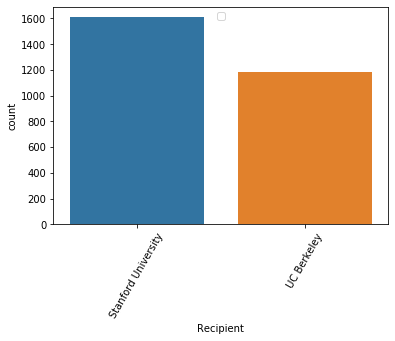

In [47]:
sns.countplot(x=df['Recipient'])
plt.xticks(rotation=60)
plt.legend(loc='upper center')
plt.show()

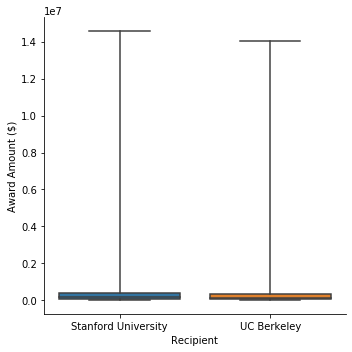

In [48]:
sns.catplot(x='Recipient', y='Award Amount ($)', data=df, kind='box', whis=[0,100])
plt.show()

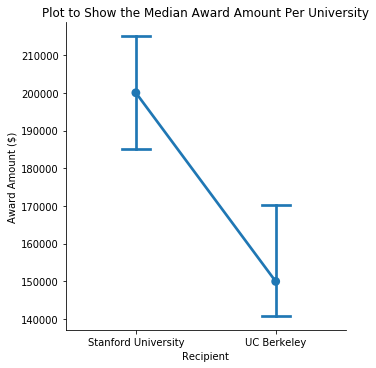

In [49]:
# Add caps to the confidence interval
sns.catplot(x="Recipient", y="Award Amount ($)",
			data=df,
            kind="point", 
            capsize=0.2, estimator=median)
        
plt.title('Plot to Show the Median Award Amount Per University')
plt.show()

Above is a point plot that shows the average of the quantitative variable (Award Amount) for the observations in each category of the universities. We see that for UC Berkeley, the median amount they received is about $150000 while Standord′s median is about $200000. The vertical lines show the 95% confidence interval for the median. This means that we are 95% confident that the median lies in the correct position.

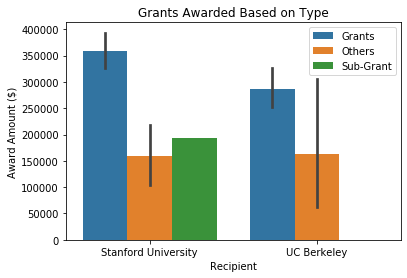

In [50]:
sns.barplot(x='Recipient', y='Award Amount ($)',hue='Award Type', data=df)
plt.title('Grants Awarded Based on Type')
plt.legend(loc='upper right')
plt.show()

This barplot shows that we have the highest number of awards going to Stanford.

In [51]:
df.to_csv('cleaned_ucb_stanford_2014.csv')
